Name: Ying Zhenyu

ID: 23043355g

In [1]:
!pip install ucimlrepo

In [2]:
# Import the necessary library
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch the dataset using its ID from the UC Irvine Machine Learning Repository
adult = fetch_ucirepo(id=2)

# Extract features and target from the dataset
X = adult.data.features
y = adult.data.targets

# Display metadata
print("Metadata:")
print(adult.metadata)

# Display variable information
print("\nVariable Information:")
print(adult.variables)

# Convert targets to a DataFrame for better visualization
y_df = pd.DataFrame(y, columns=["income"])

# Show the first few rows of the features DataFrame
print("\nFirst few rows of features:")
print(X.head())

# Show the first few rows of the targets DataFrame
print("\nFirst few rows of targets:")
print(y_df.head())

# Describe the features DataFrame (summary statistics)
print("\nSummary statistics of features:")
print(X.describe())

# Describe the targets DataFrame
print("\nSummary statistics of targets:")
print(y_df.describe())

# Check for missing values in the features and targets
print("\nMissing values in features:")
print(X.isnull().sum())

print("\nMissing values in targets:")
print(y_df.isnull().sum())

# Check the distribution of the target variable
print("\nDistribution of target variable:")
print(y_df['income'].value_counts())

Metadata:
{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditi

In [3]:
# Merge categories in the target variable
y_df['income'] = y_df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

# Remove rows with missing values in features
X_clean = X.dropna()

# Since we cleaned X, we need to also remove corresponding rows in y
y_clean = y_df.iloc[X_clean.index]

# Verify the changes
print("\nUpdated distribution of target variable after merging categories:")
print(y_clean['income'].value_counts())

print("\nRemaining missing values in features after cleaning:")
print(X_clean.isnull().sum())

# Check the first few rows of the cleaned datasets
print("\nFirst few rows of cleaned features:")
print(X_clean.head())

print("\nFirst few rows of cleaned targets:")
print(y_clean.head())


Updated distribution of target variable after merging categories:
income
<=50K    36080
>50K     11541
Name: count, dtype: int64

Remaining missing values in features after cleaning:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

First few rows of cleaned features:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerica

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Encoding categorical columns using OneHotEncoder
categorical_features = [col for col in X_clean.columns if X_clean[col].dtype == 'object']
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder="passthrough")

X_encoded = transformer.fit_transform(X_clean)

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_clean['income'])

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

Accuracy scores for Decision Tree: [0.81286089 0.81506759 0.81703636 0.81467384 0.81716761]
Mean accuracy: 0.8153612584094398


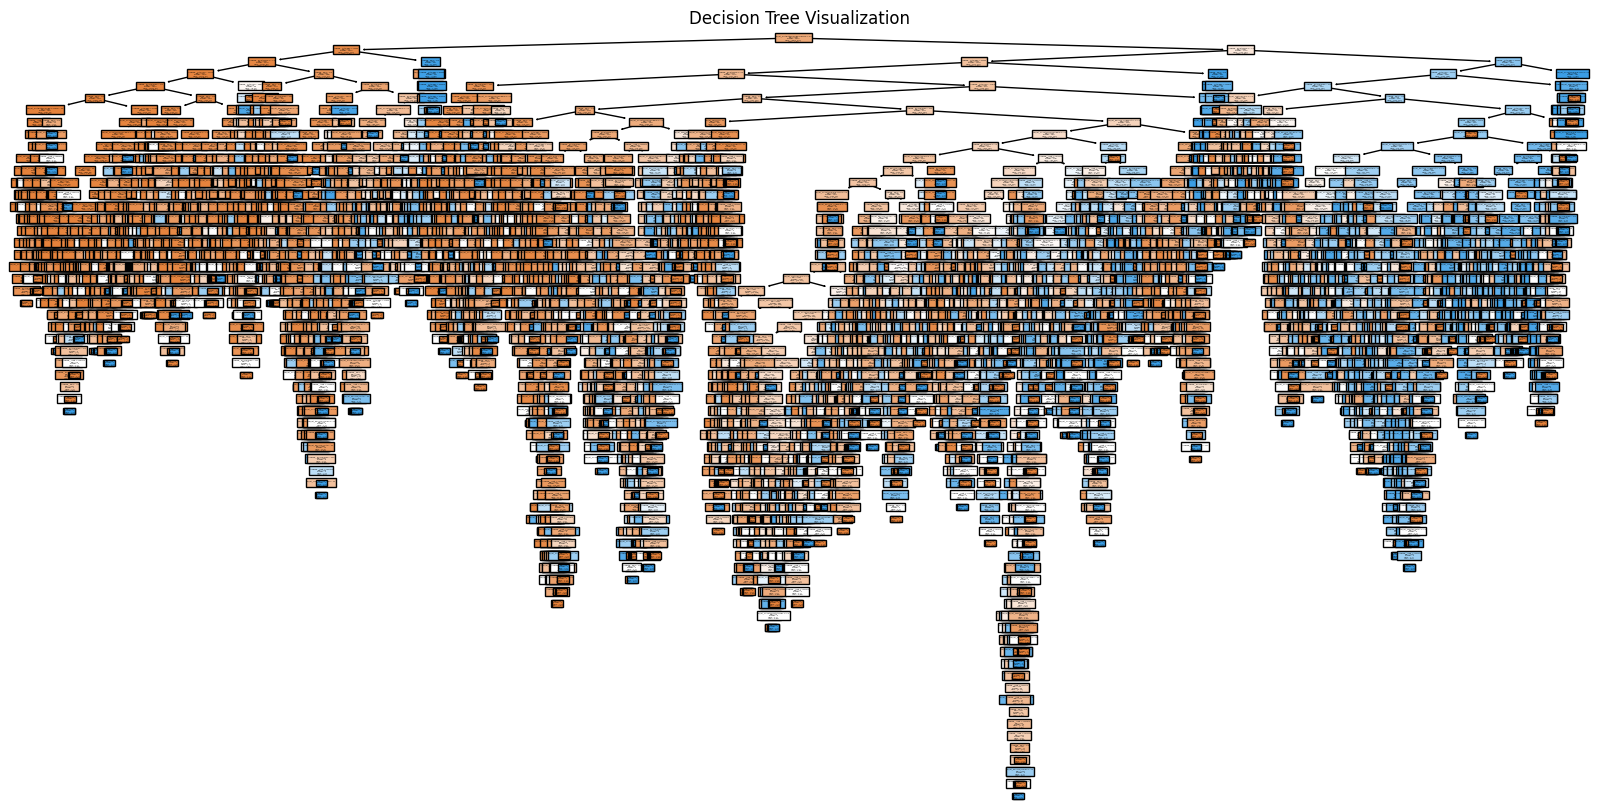

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
tree_scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='accuracy')

print("Accuracy scores for Decision Tree:", tree_scores)
print("Mean accuracy:", np.mean(tree_scores))

# Fit the model to the entire training data
tree_model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20,10))  # Set the size of the figure, adjust as necessary
plot_tree(tree_model, filled=True, feature_names=transformer.get_feature_names_out(), class_names=['<=50K', '>50K'])
plt.title("Decision Tree Visualization")
plt.show()

In [6]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Perform 5-fold cross-validation
gnb_scores = cross_val_score(gnb_model, X_train.toarray(), y_train, cv=5, scoring='accuracy')

print("Accuracy scores for Gaussian Naive Bayes:", gnb_scores)
print("Mean accuracy:", np.mean(gnb_scores))

# Fit the model to the entire training data
gnb_model.fit(X_train.toarray(), y_train)

Accuracy scores for Gaussian Naive Bayes: [0.79317585 0.7920987  0.79695498 0.78999869 0.79774249]
Mean accuracy: 0.7939941415972432


GaussianNB()

In [20]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Continue using the previously loaded and preprocessed data X_clean, y_clean

# Categorize numeric data into quartiles and avoid chained assignments
num_cols = X_clean.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    X_clean.loc[:, col] = pd.qcut(X_clean[col], q=4, duplicates='drop', labels=[f'{col}_Q1', f'{col}_Q2', f'{col}_Q3', f'{col}_Q4'])

# Update the list of categorical features to include the new quartile-binned numeric features
categorical_features = [col for col in X_clean.columns if X_clean[col].dtype == 'object' or col in num_cols]

# Apply OneHotEncoder encoding
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
X_encoded = transformer.fit_transform(X_clean)
feature_names = transformer.get_feature_names_out()

# Convert the encoded data into a DataFrame
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=feature_names)

# Encode the target variable
y_encoded = LabelEncoder().fit_transform(y_clean['income'])

# Combine features and target variable into one DataFrame for association rule analysis
data_for_ar = pd.concat([X_encoded_df, pd.DataFrame(y_encoded, columns=["income"])], axis=1)

# Use Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(data_for_ar, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Sort rules by lift and print the top 5 rules
top_rules = rules.sort_values(by='lift', ascending=False).head(5)
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                                                                            antecedents  \
1945                                         (one_hot__education_Some-college, one_hot__capital-gain_0)   
4206                                                                  (one_hot__education_Some-college)   
4193  (one_hot__native-country_United-States, one_hot__capital-loss_0, one_hot__education_Some-college)   
4195                       (one_hot__capital-loss_0, one_hot__education-num_1, one_hot__capital-gain_0)   
4197                (one_hot__capital-loss_0, one_hot__education_Some-college, one_hot__capital-gain_0)   

                                                                                                              consequents  \
1945                                                                  (one_hot__education-num_1, one_hot__capital-loss_0)   
4206  (one_hot__native-country_United-States, one_hot__capital-loss_0, one_hot__education-num_1, one_hot__c

I started by importing the adult dataset, then went ahead and did a quick look at it and then handled the missing values, merged the values that had the same meaning but were expressed differently, and used one-hot encoding for textual labels, completing the preprocessing.

Then, I divided the wage based on 50K income using two methods, decision tree and Naive Bayes, and set up the cross-validation. Next, I vusualized the decision tree diagram. However, because of the intricacy of the decision tree, the visualization was not very good.

In the last step, I did the association rule mining and gave the top five rules with the highest lift as the reference. It was observed that some interesting rules either existed: For example, if a person has a college education and low capital gains, it is highly probable that the capital losses will also be low. This may implits that people with college education level have less active tendency to participate in investment process.